In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving amazon_alexa.tsv to amazon_alexa.tsv
User uploaded file "amazon_alexa.tsv" with length 514752 bytes


## Explanatory data

In [20]:
amazon = pd.read_csv("amazon_alexa.tsv", sep="\t")
amazon.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [21]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [22]:
amazon.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


Describing the feeling of clients through the rating.

- Positive
- Neutral
- Negative


In [23]:
pd.options.display.max_colwidth = 200

for i in range(10,20):
  print(amazon["verified_reviews"].loc[i])

I sent it to my 85 year old Dad, and he talks to it constantly.
I love it! Learning knew things with it eveyday! Still figuring out how everything works but so far it's been easy to use and understand. She does make me laugh at times
I purchased this for my mother who is having knee problems now, to give her something to do while trying to over come not getting around so fast like she did.She enjoys all the little and big things it can do...Alexa play this song, What time is it and where, and how to cook this and that!
Love, Love, Love!!
Just what I expected....
I love it, wife hates it.
Really happy with this purchase.  Great speaker and easy to set up.
We have only been using Alexa for a couple of days and are having a lot of fun with our new toy. It like having a new household member! We are trying to learn all the different featues and benefits that come with it.
We love the size of the 2nd generation echo. Still needs a little improvement on sound
I liked the original Echo. This i

### Describing the statistics of verified reviewes for identifying the most word used

In [24]:
amazon["length"]= amazon["verified_reviews"].apply(len)
amazon.head(n=5)

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,195
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


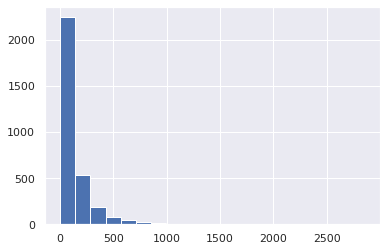

In [25]:
plt.hist(amazon['length'], bins = 20)
pass
# Histogram for character used in verified reviews

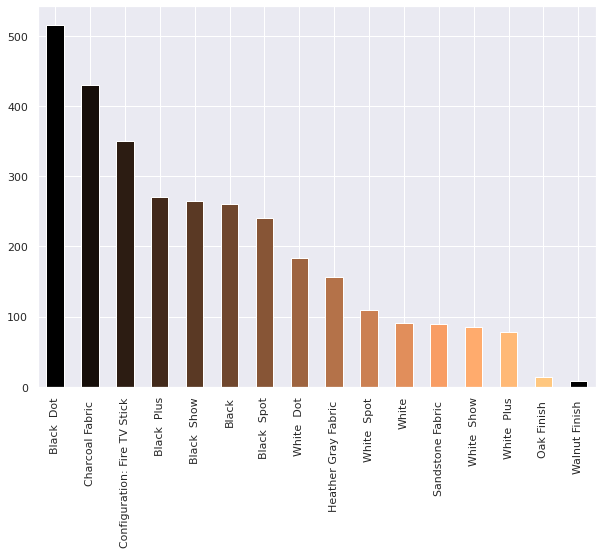

In [26]:
import numpy as np
color = plt.cm.copper(np.linspace(0, 1, 15))
amazon["variation"].value_counts().plot.bar(color= color, figsize= (10,7))

### the feedback and ratings Repartition 








In [0]:
import plotly as py
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff

In [28]:
ratings = amazon['rating'].value_counts()

label_rating = ratings.index
size_rating = ratings.values

colors = ['pink', 'lightblue', 'aqua', 'gold', 'crimson']

rating_piechart = go.Pie(labels = label_rating,
                         values = size_rating,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)

df = [rating_piechart]

layout = go.Layout(
           title = 'Distribution of Ratings for Alexa')

fig = go.Figure(data = df,
                 layout = layout)


feedbacks = amazon['feedback'].value_counts()

label_feedback = feedbacks.index
size_feedback = feedbacks.values

colors = ['bluelight', 'greenlight']

feedback_piechart = go.Pie(labels = label_feedback,
                         values = size_feedback,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)

df2 = [feedback_piechart]

layout = go.Layout(
           title = 'Distribution of Feedbacks for Alexa')

fig2 = go.Figure(data = df2,
                 layout = layout)

py.io.show(fig)
py.io.show(fig2)

Ratings for alexa  have a good mark overall thanks to distribution of the graph upper. the graph suggests alexa products to be useful for more than half clients amazon.
Almost clients gave a mark greather than or equals to 4.

In [29]:
amazon.groupby("feedback").describe()

rating                                ... length                            
           count      mean       std  min  25%  ...    min   25%    50%    75%     max
feedback                                        ...                                   
0          257.0  1.373541  0.484688  1.0  1.0  ...    1.0  53.0  137.0  289.0  1686.0
1         2893.0  4.737643  0.546544  3.0  5.0  ...    1.0  29.0   69.0  154.0  2851.0

[2 rows x 16 columns]

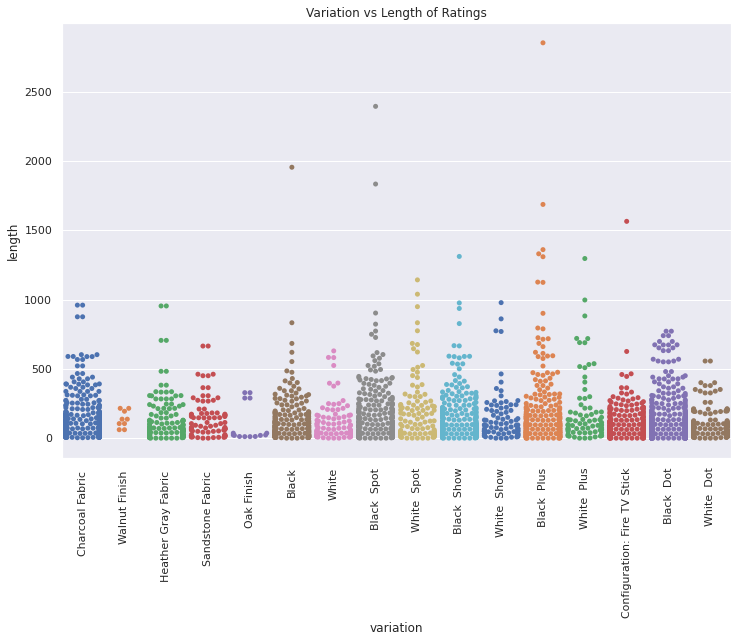

In [30]:
plt.figure(figsize=(12, 8))
sns.swarmplot(amazon['variation'], amazon['length'], palette = 'deep')
plt.title("Variation vs Length of Ratings")
plt.xticks(rotation = 90)
pass

In [31]:
!pip install wordcloud

### Zipf's law

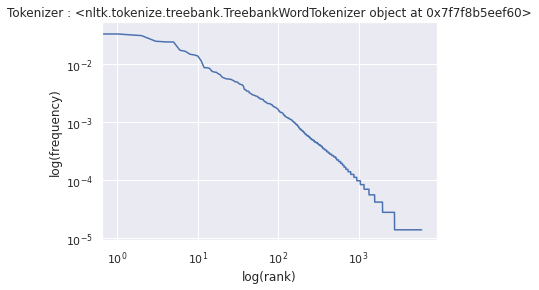

In [32]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import TweetTokenizer
from collections import Counter
import matplotlib.pyplot as plt
from functools import reduce
from operator import add
tokenizers = [TreebankWordTokenizer()]

for tok in tokenizers:
  arr = amazon.verified_reviews.drop_duplicates().apply(lambda x: tok.tokenize(x)).array
  arr = reduce(add, arr)
  c = Counter(arr)
  d = pd.DataFrame(c, index=['occurrences']).transpose().reset_index()
  d.columns=['word', 'occurences']
  nb_total = d.occurences.sum()
  d['freq'] = d.occurences.apply(lambda x: x/nb_total)
  d = d.sort_values('freq', ascending=False)
  plt.figure()
  plt.grid()
  plt.xscale('log')
  plt.yscale('log')
  plt.xlabel('log(rank)')
  plt.ylabel('log(frequency)')
  plt.title("Tokenizer : {0}".format(tok))
  x = list(range(d.shape[0]))
  plt.plot(x, d.freq)
  plt.grid(True)
  plt.show()

The zipf's law assumption is True, it means the most common word used in text mining is the short word as article , pronoun etc and the others are rare.

## Visualization 

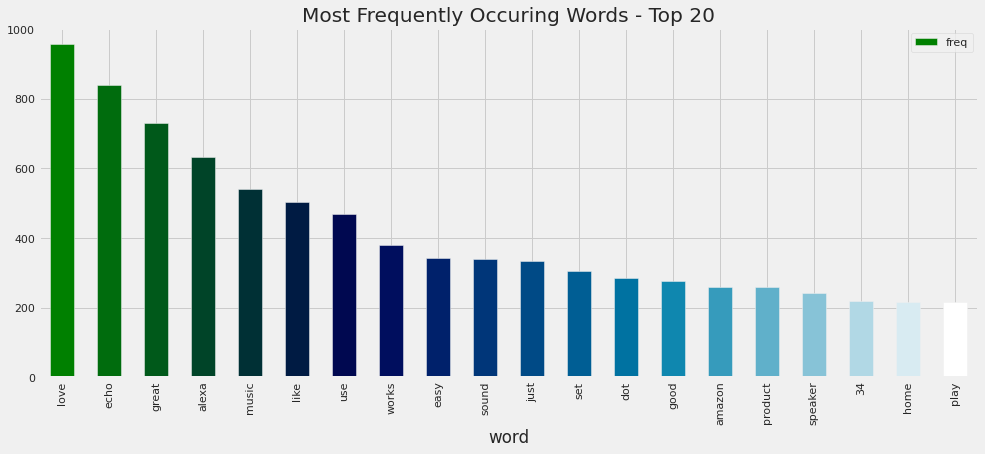

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(amazon.verified_reviews)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

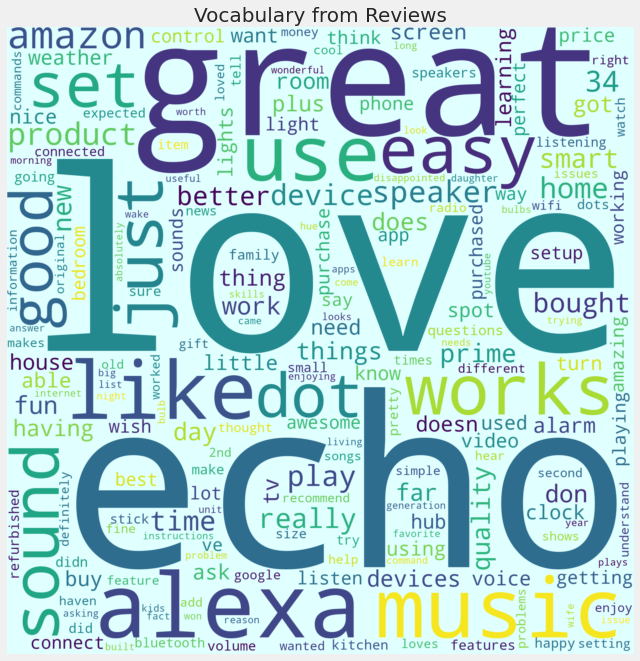

In [38]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))
plt.figure(figsize=(10, 15))
plt.axis('off')
plt.imshow(wordcloud, interpolation = "bilinear")
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

## preprocessing data

In [0]:
import time
class cleaned_docs():
  def __init__(self, corpus=None, tweet=False):
      self.corpus = corpus
      self.tokens = None
      self.tweet = tweet
  
  def remove_hashtags(self, tokens):
    '''remove all hashatags in tokens'''
    self.tokens= list(map(lambda r: r.replace("#",''), tokens))
    #time.sleep(1e-10)
  
  def remove_url(self, tokens):
    '''remove all url in tokens'''
    self.tokens = list(filter(lambda r: "http" not in r, tokens))
    #time.sleep(1e-10)
  
  def remove_html(self,tokens):
    '''remove all html in tokens'''
    self.tokens = list(filter(lambda r: r[0]+r[-1] != '<>', tokens))
    #time.sleep(1e-10)
  
  def tokenize(self):
    from tqdm import tqdm
    from nltk.tokenize import ToktokTokenizer, TweetTokenizer
    tokenized_sentences = []
    if self.tweet ==False:
      tokenizer = ToktokTokenizer()
    elif self.tweet == True:
      tokenizer = TweetTokenizer()
    for _, sample in tqdm(enumerate(self.corpus)):
      self.remove_url(tokenizer.tokenize(sample.lower()))
      self.remove_html(self.tokens)
      self.remove_hashtags(self.tokens)
      tokenized_sentences.append(self.tokens)
    return tokenized_sentences

In [0]:
from gensim.models.phrases import Phrases, Phraser

def clean_corpus(corpus, threshold=50, tweets=False):
  tokenized_sentences = cleaned_docs(corpus, tweet=tweets).tokenize()
  phrases = Phrases(tokenized_sentences, threshold=threshold)
  phraser = Phraser(phrases)
  
  clean_corpus = []
  for sentence in tokenized_sentences:
    clean_corpus.append(phraser[sentence])
  
  return clean_corpus

In [35]:
reviews = clean_corpus(amazon.verified_reviews.array, threshold = 1000, tweets=True)
print(reviews[60])

3150it [00:00, 10269.88it/s]


['😍']


### Distribution of variation vs rating

In [36]:
from spacy import displacy
import spacy
nlp = spacy.load("en_core_web_sm")
tokens = []
for line in amazon.verified_reviews.drop_duplicates()[17:22]:
  doc = nlp(line)
  tokens.append(doc)
displacy.render(tokens, style="ent",jupyter=True)

Wordcloud analyzes customer feedback and allow to see what customer(client) like most about amazon product.


In [0]:
from gensim.models import Word2Vec
from multiprocessing import cpu_count

cpu = cpu_count()

def training_W2C(tokens_sent, min_count=1,size= 100,workers=cpu, window =3, sg = 1):
  model = Word2Vec(tokens_sent,min_count=min_count,size=size,workers=workers,window=window)
  model.train(tokens_sent, total_examples = len(tokens_sent), epochs =20)
  #The trained word vectors are stored in a KeyedVectors instance in model.wv
  return model.wv

In [0]:
def tokens2vectors(tokenCorpus, model_vw):
  new_sample = list()
  for sample in tokenCorpus:
    tweetVecs = list()
    for token in sample.split(' '):
      try: tweetVecs.append(model_vw.get_vector(token)  )
      except: tweetVecs.append( np.zeros(100) ) 
    new_sample.append(np.mean(tweetVecs, axis=0))
  return np.array(new_sample)

In [0]:
reviews_wv = training_W2C(reviews)

data = tokens2vectors(amazon.verified_reviews, reviews_wv)

In [0]:
amazon['positive'] = 0

amazon.loc[amazon['rating'] >3,'positive'] = 'positive'

amazon.loc[amazon['rating'] <=3,'positive'] = 'negative'


In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=20, max_iter=1000, verbose=0).fit(data)
clusters = kmeans.predict(data)

In [44]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=30, learning_rate=100.0, early_exaggeration=2., n_iter=250)
X_tsne = tsne.fit_transform(data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3150 samples in 0.037s...
[t-SNE] Computed neighbors for 3150 samples in 1.881s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3150
[t-SNE] Computed conditional probabilities for sample 2000 / 3150
[t-SNE] Computed conditional probabilities for sample 3000 / 3150
[t-SNE] Computed conditional probabilities for sample 3150 / 3150
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 6.614678
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


In [45]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np


mapColors = {0:'lightseagreen', 1:'blueviolet', 2:'tomato'}
mapSentColors = {'positive':'lightseagreen', 'neutral':'blueviolet', 'negative':'tomato'}
colorsClusters = [mapColors[c] for c in clusters]
colorsSentiment = [mapSentColors[s] for s in amazon["positive"]]

fig = go.Figure(data=go.Scatter(
    x = X_tsne[:, 0],
    y = X_tsne[:, 1],
    hovertext = list(zip(amazon["variation"], amazon["positive"])),
    mode='markers+text',
    marker=dict(
        size=4,
        color=colorsClusters, # colorsClusters or colorsSentiment
        colorscale='Viridis',
        showscale=True,
    )
))
fig.show()
pass

In [0]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
def cluster_text(data):
  vec = TfidfVectorizer(stop_words="english")
  vec.fit(data.verified_reviews.values)
  features = vec.transform(data.verified_reviews.values)
  cls = MiniBatchKMeans(n_clusters=2, random_state=42)
  cls.fit(features)
  clusters = cls.predict(features)
  pca = PCA(n_components=2, random_state=42)
  reduced_features = pca.fit_transform(features.toarray())
  reduced_cluster_centers = pca.transform(cls.cluster_centers_)
  mapColors = {0:'lightseagreen', 1:'blueviolet'}
  mapSentColors = {'positive':'lightseagreen', 'negative':'tomato'}
  colorsClusters = [mapColors[c] for c in clusters]
  colorsSentiment = [mapSentColors[s] for s in amazon["positive"]]

  fig = go.Figure(data=go.Scatter(
    x = reduced_features[:,0],
    y = reduced_features[:,1],
    hovertext = list(zip(amazon["variation"], amazon["positive"])),
    mode='markers+text',
    marker=dict(
        size=4,
        color=colorsClusters, # colorsClusters or colorsSentiment
        colorscale='Viridis',
        showscale=True,
    )
  ))

  fig.update_layout(
    title="Verified_reviews & variation vs rating encoding",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
  )
  fig.show()

"""
The Recursive Feature Elimination (RFE) method works by recursively removing
 attributes and building a model on those attributes that remain. 
It uses accuracy metric to rank the feature according to their importance
"""
pass

In [48]:
cluster_text(amazon)

## Training Data

Build our embedding model, to find the pattern of feedback

In [0]:
from sklearn.model_selection import train_test_split

amazon['positive'] = 0
amazon.loc[amazon['rating'] >3,'positive'] = 1
amazon.loc[amazon['rating'] <=3,'positive'] = 0
training_data, test_data = train_test_split(amazon, test_size = 0.3)
training_data.to_csv("training_data.csv")
test_data.to_csv("test_data.csv")

In [50]:
training_data.head()

,rating,date,variation,verified_reviews,feedback,length,positive
3107,5,30-Jul-18,Black Dot,Easy to connect and the skills created for our Echo 2nd Gen worked fine with the Dot.,1,85,1
2721,5,30-Jul-18,Black Dot,I love the option where u can play music everywhere in the house when you have multiple devices,1,95,1
2767,5,30-Jul-18,Black Dot,"excellent device , works great, having no problems or concerns",1,62,1
1320,5,21-Jul-18,Black Spot,Such a handy item to have on my night stand. She reads to me at night and gets me all set for the day in the morning with my calendar and weather views.,1,152,1
1423,2,30-Jul-18,Black Show,No you tube wouldn't have bought it if I known that,0,51,0


In [51]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
train_data, label_train = training_data['verified_reviews'].values, training_data['positive'].values
test_val,test_test, label_val,label_test = train_test_split(test_data['verified_reviews'].values, test_data['positive'].values,
                                                            test_size = 0.5)

#Tokenize the sentences
tokenizer = Tokenizer()

#preparing vocabulary
tokenizer.fit_on_texts(list(train_data))

#converting text into integer sequences
train_data_seq  = tokenizer.texts_to_sequences(train_data) 
test_val_seq = tokenizer.texts_to_sequences(test_val)
test_test_seq = tokenizer.texts_to_sequences(test_test)
#padding to prepare sequences of same length
train_data_seq  = pad_sequences(train_data_seq, maxlen=100)
test_val_seq = pad_sequences(test_val_seq, maxlen=100)
test_test_seq = pad_sequences(test_test_seq, maxlen=100 )

In [53]:
from keras.models import Sequential
from keras.layers import LSTM, GlobalMaxPooling1D,Embedding, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

size_of_vocabulary=len(tokenizer.word_index) + 1
model=Sequential()
model.add(Embedding(size_of_vocabulary,300,input_length=100,trainable=True)) 
model.add(LSTM(128,return_sequences=True,dropout=0.2))
model.add(Dropout(0.2))
model.add(GlobalMaxPooling1D())
model.add(Dense(64,activation='relu')) 
model.add(Dense(1,activation='sigmoid')) 
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=["acc"]) 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)  
mc=ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)  

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          1101900   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 128)          219648    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,329,869
Trainable params: 1,329,869
Non-trainable params: 0
____________________________________________

In [54]:
history = model.fit(np.array(train_data_seq),np.array(label_train),batch_size=100,epochs=10,
                    validation_data=(np.array(test_val_seq),np.array(label_val)),verbose=1,callbacks=[es,mc])

Train on 2205 samples, validate on 472 samples
Epoch 1/10
2205/2205 [==============================] - 6s 3ms/step - loss: 0.4391 - acc: 0.8413 - val_loss: 0.3968 - val_acc: 0.8814

Epoch 00001: val_acc improved from -inf to 0.88136, saving model to best_model.h5
Epoch 2/10
2205/2205 [==============================] - 4s 2ms/step - loss: 0.3692 - acc: 0.8766 - val_loss: 0.3898 - val_acc: 0.8814

Epoch 00002: val_acc did not improve from 0.88136
Epoch 3/10
2205/2205 [==============================] - 4s 2ms/step - loss: 0.3596 - acc: 0.8844 - val_loss: 0.3656 - val_acc: 0.8814

Epoch 00003: val_acc did not improve from 0.88136
Epoch 4/10
2205/2205 [==============================] - 4s 2ms/step - loss: 0.3376 - acc: 0.8880 - val_loss: 0.3696 - val_acc: 0.8729

Epoch 00004: val_acc did not improve from 0.88136
Epoch 5/10
2205/2205 [==============================] - 4s 2ms/step - loss: 0.2925 - acc: 0.8884 - val_loss: 0.3023 - val_acc: 0.8814

Epoch 00005: val_acc did not improve from 0.88

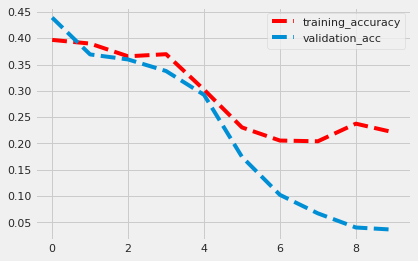

In [55]:
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], '--',  color ="red", label = "training_accuracy")
plt.plot(range(len(history.history['loss'])), history.history['loss'],'--', label = "validation_acc")
plt.legend()

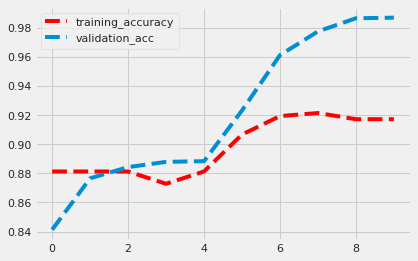

In [56]:
plt.plot(range(len(history.history['val_acc'])), history.history['val_acc'], '--',  color ="red", label = "training_accuracy")
plt.plot(range(len(history.history['acc'])), history.history['acc'],'--', label = "validation_acc")
plt.legend()

In [57]:
from sklearn.metrics import accuracy_score,mean_squared_error
y_preds = model.predict(test_test_seq)
print("mean squared of predictor : {}".format(mean_squared_error(y_preds, label_test)))

mean squared of predictor : 0.0779529956984243


In [58]:
!pip install transformers
!pip install torch torchvision

     |████████████████████████████████| 573kB 42.8MB/s 
     |████████████████████████████████| 1.0MB 56.0MB/s 
     |████████████████████████████████| 870kB 53.6MB/s 
     |████████████████████████████████| 3.7MB 51.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.40-cp36-none-any.whl size=893351 sha256=6f93a280208f981bad6f35b7975a5a7a6e3618e7ac366f4d13b7d5b2a8629969
  Stored in directory: /root/.cache/pip/wheels/ba/44/6e/939fb8625572dca96344566c5167bc4f8ab079294509898141
Successfully built sacremoses


### Pretrained model for prediction

In [0]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from transformers import BertTokenizer, AutoModel, AutoTokenizer
import pandas as pd
from torch.utils.data import DataLoader

class SSTDataset(Dataset):

    def __init__(self, filename, maxlen, model_name='bert-base-uncased'):
      self.df = pd.read_csv(filename)
      self.tokenizer = AutoTokenizer.from_pretrained(model_name)
      self.maxlen = maxlen

    def __len__(self):
        return len(self.df)
        
    def __getitem__(self, index):

        #Selecting the sentence and label at the specified index in the data frame
        sentence = self.df.loc[index, 'verified_reviews']
        label = self.df.loc[index, 'positive']

        #Preprocessing the text to be suitable for BERT
        tokens = self.tokenizer.tokenize(sentence) #Tokenize the sentence
        if self.tokenizer.cls_token is None:
          bos_token = self.tokenizer.bos_token
        else:
          bos_token = self.tokenizer.cls_token
          
        if self.tokenizer.sep_token is None:
          eos_token = self.tokenizer.eos_token
        else:
          eos_token = self.tokenizer.sep_token
        
        tokens = [bos_token] + tokens + [eos_token] #Insering the CLS and SEP token in the beginning and end of the sentence
        if len(tokens) < self.maxlen:
            tokens = tokens + [self.tokenizer.pad_token for _ in range(self.maxlen - len(tokens))] #Padding sentences
        else:
            tokens = tokens[:self.maxlen-1] + [eos_token] #Prunning the list to be of specified max length

        tokens_ids = self.tokenizer.convert_tokens_to_ids(tokens) #Obtaining the indices of the tokens in the BERT Vocabulary
        tokens_ids_tensor = torch.tensor(tokens_ids) #Converting the list to a pytorch tensor
        #Obtaining the attention mask i.e a tensor containing 1s for no padded tokens and 0s for padded ones
        attn_mask = (tokens_ids_tensor != 0).long()

        return tokens_ids_tensor, attn_mask, label

In [60]:
#Creating instances of training and validation set

train_set = SSTDataset(filename = 'training_data.csv', maxlen = 40, model_name='bert-base-uncased')
val_set = SSTDataset(filename = 'test_data.csv', maxlen = 40, model_name='bert-base-uncased')

#Creating intsances of training and validation dataloaders
train_loader = DataLoader(train_set, batch_size = 4, num_workers = 5)
val_loader = DataLoader(val_set, batch_size = 4, num_workers = 5)

In [0]:
class SentimentClassifier(nn.Module):

    def __init__(self, pretrained_model_name='bert-base-uncased'):
        super(SentimentClassifier, self).__init__()

        self.encoder = AutoModel.from_pretrained(pretrained_model_name)
        self.cls_layer = nn.Linear(self.encoder.pooler.dense.out_features, 1)

    def forward(self, seq, attn_masks):
        '''
        Inputs:
            -seq : Tensor of shape [B, T] containing token ids of sequences
            -attn_masks : Tensor of shape [B, T] containing attention masks to be used to avoid contibution of PAD tokens
        '''

        #Feeding the input to BERT model to obtain contextualized representations
        cont_reps, _ = self.encoder(seq, attention_mask = attn_masks)

        #Obtaining the representation of [CLS] head
        cls_rep = cont_reps[:, 0]

        #Feeding cls_rep to the classifier layer
        logits = self.cls_layer(cls_rep)

        return logits

In [62]:
import torch.nn as nn
import torch.optim as optim


sentiment_model = SentimentClassifier('bert-base-uncased')
sentiment_model = sentiment_model.to("cuda")
criterion = nn.BCEWithLogitsLoss()
opti = optim.Adam(sentiment_model.parameters(), lr = 1e-6)

In [0]:
import pdb
def train(model, criterion, opti, train_loader, val_loader, max_eps=1, gpu=False, print_every=1,validate_every=1):
    if gpu:
      model = model.to("cuda")
    history = {'loss':[], 'acc':[], 'val_loss':[], 'val_acc':[]}
    for ep in range(max_eps):
        
        for it, (seq, attn_masks, labels) in enumerate(train_loader):
            #Clear gradients
            opti.zero_grad()  
            #Converting these to cuda tensors
            if gpu:
              seq, attn_masks, labels = seq.cuda(), attn_masks.cuda(), labels.cuda()
            #Obtaining the logits from the model
            logits = model(seq, attn_masks)

            #Computing loss
            #assert isinstance(labels, list), "the type of labels = {}".format(type(labels[0]))
            loss = criterion(logits.squeeze(-1), labels.float())

            #Backpropagating the gradients
            loss.backward()

            #Optimization step
            opti.step()

            if (it + 1) % print_every == 0:
                accuracy = torch.sum((logits>0).int().squeeze(1)==labels)/float(labels.size(0))
                print("Iteration {} of epoch {} complete. Loss : {}, Accuracy {} ".format(it+1, ep+1, loss.item(),accuracy))
                history["loss"].append(loss.item())
                history["acc"].append(accuracy)
            if it>1000:
              break
        if ep % validate_every==0:
          n_batch_validation = 0
          loss_validation = 0
          accuracy_validation = 0
          for it, (seq, attn_masks, labels) in enumerate(val_loader):
            #Clear gradients
            
            if gpu:
              seq, attn_masks, labels = seq.cuda(), attn_masks.cuda(), labels.cuda()
            #Obtaining the logits from the model
            logits_val = model(seq, attn_masks)
            n_batch_validation+=1
            #Computing loss
            _loss = float(criterion(logits_val.squeeze(-1), labels.float()))
            _accu = float(torch.sum((logits_val>0).int().squeeze(1)==labels)/float(labels.size(0)))
            loss_validation += _loss
            accuracy_validation += _accu
            if (it + 1) % print_every == 0:
                history["val_loss"].append(_loss)
                history["val_acc"].append(_accu)
                print("EVALUATION Validation set : mean loss {} n mean accuracy {}".format(loss_validation/n_batch_validation, accuracy_validation/n_batch_validation))
            if it>1000:
              break
          
    return history  

In [97]:
history= train(sentiment_model, criterion, opti, train_loader, val_loader, max_eps=5, print_every=100, gpu=True)

Iteration 100 of epoch 1 complete. Loss : 6.449012289522216e-05, Accuracy 1.0 
Iteration 200 of epoch 1 complete. Loss : 7.15226778993383e-05, Accuracy 1.0 
Iteration 300 of epoch 1 complete. Loss : 7.62608033255674e-05, Accuracy 1.0 
Iteration 400 of epoch 1 complete. Loss : 6.1033271776977926e-05, Accuracy 1.0 
Iteration 500 of epoch 1 complete. Loss : 7.408551027765498e-05, Accuracy 1.0 
EVALUATION Validation set : mean loss 0.34795772451777535 n mean accuracy 0.9356540084388185
Iteration 100 of epoch 2 complete. Loss : 6.142068014014512e-05, Accuracy 1.0 
Iteration 200 of epoch 2 complete. Loss : 6.925789057277143e-05, Accuracy 1.0 
Iteration 300 of epoch 2 complete. Loss : 6.410266360035166e-05, Accuracy 1.0 
Iteration 400 of epoch 2 complete. Loss : 5.9006837545894086e-05, Accuracy 1.0 
Iteration 500 of epoch 2 complete. Loss : 7.071814616210759e-05, Accuracy 1.0 
EVALUATION Validation set : mean loss 0.3487801024666355 n mean accuracy 0.9367088607594937
Iteration 100 of epoch 3 

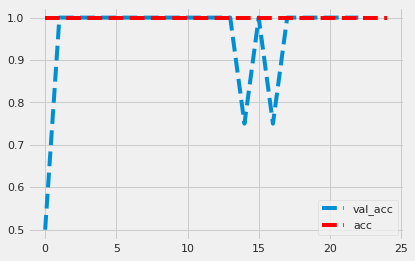

In [94]:
plt.plot(range(len(history["val_acc"])), history["val_acc"],"--",label = "val_acc")
plt.plot(range(len(history["acc"])), history["acc"],"--",label = "training acc", color = "red")
plt.legend()

Not useful model

### Training model and another approach

In [57]:
import nltk
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [58]:
from nltk.tokenize import word_tokenize 
import string
from nltk.corpus import stopwords 

punctuation = set(string.punctuation)-set('.')

stop_words = set(stopwords.words('english')) 

stop_words = stop_words.union(punctuation)

amazon['positive'] = 0

amazon.loc[amazon['rating'] >=4,'positive'] = 1

amazon.loc[amazon['rating'] <4,'positive'] = 0

amazon['cleaned_reviews'] = amazon.verified_reviews.apply(lambda x: word_tokenize(x))

amazon['cleaned_reviews'] = amazon.cleaned_reviews.apply(lambda x: [w.lower() for w in x if w.lower() not in stop_words])

amazon['cleaned_reviews'] = amazon.cleaned_reviews.apply(lambda x: ' '.join(x))

amazon.head()

,rating,date,variation,verified_reviews,feedback,length,positive,cleaned_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,1,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,1,loved
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,195,1,sometimes playing game answer question correctly alexa says got wrong answers . like able turn lights away home .
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1,172,1,lot fun thing . 4 yr old learns dinosaurs control lights play games like categories . nice sound playing music well .
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,1,music


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_train, X_test, y_train, y_test = train_test_split(amazon["cleaned_reviews"], amazon["positive"], test_size=0.30,random_state=53)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 53)
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

y_train = np.asarray(y_train.values)

ch2 = SelectKBest(chi2, k = 300)

X_new = ch2.fit_transform(count_train, y_train)

# Transform the test data using only the 'text' column values: count_val
count_val = count_vectorizer.transform(X_val)

y_val = np.asarray(y_val.values)

X_val_new = ch2.transform(X=count_val)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

X_test_new = ch2.transform(X= count_test)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_val 
tfidf_val = tfidf_vectorizer.transform(X_val)

#Transform the test data : tfidf_test 

tfidf_test = tfidf_vectorizer.transform(X_test)

In [61]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

   00  000  10  100  100x  11  ...  yup  zero  zigbee  zonked  zzzzzzz  útil
0   0    0   0    0     0   0  ...    0     0       0       0        0     0
1   0    0   0    0     0   0  ...    0     0       0       0        0     0
2   0    0   0    0     0   0  ...    0     0       0       0        0     0
3   0    0   0    0     0   0  ...    0     0       0       0        0     0
4   0    0   0    0     0   0  ...    0     0       0       0        0     0

[5 rows x 3214 columns]
    00  000   10  100  100x   11  ...  yup  zero  zigbee  zonked  zzzzzzz  útil
0  0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0   0.0     0.0     0.0      0.0   0.0
1  0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0   0.0     0.0     0.0      0.0   0.0
2  0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0   0.0     0.0     0.0      0.0   0.0
3  0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0   0.0     0.0     0.0      0.0   0.0
4  0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0   0.0     0.0     0.0      0.0   0.0

[5 rows x 3214 columns]
set()
Fa

In [62]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MultiLabelBinarizer

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(X_new, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(X_test_new)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print('Accuracy is:',score)
f1 = metrics.f1_score(y_test, pred)
print('F score is:',f1)

Accuracy is: 0.8858350951374208
F score is: 0.9366197183098591


In [63]:
X_new.toarray()[0:10].shape

(10, 300)

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

scorer = metrics.make_scorer(metrics.fbeta_score, beta=0.5)

parameters = {'n_estimators': [150, 180, 250], 'max_features': [120,150], 'max_depth': [120,135,150],
              'min_samples_split':[3,5],'min_samples_leaf':[1,3,5]}

grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

grid_fit = grid_obj.fit(X_new, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

best_predictions = best_clf.predict(X_test_new)

score = metrics.accuracy_score(y_test, best_predictions)
print('Accuracy is:',score)
f1 = metrics.f1_score(y_test, best_predictions)
print('F score is:',f1)

Accuracy is: 0.8752642706131079
F score is: 0.930011862396204


In [0]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(grid_obj, X_new, y_train, cv=3)

In [69]:
print("test score after cross- validation ",np.mean(cv_results['test_score']))

test score after cross- validation  0.9283033461632316


## Recommandation system

In [70]:
ratings = pd.DataFrame(amazon.groupby("variation")["rating"].mean())
ratings['number_of_rating'] = amazon.groupby("variation")['rating'].count()
ratings.head()

,rating,number_of_rating
variation,,
Black,4.233716,261
Black Dot,4.453488,516
Black Plus,4.370370,270
Black Show,4.490566,265
Black Spot,4.311203,241


Text(0.5, 1.0, 'number of rating according product')

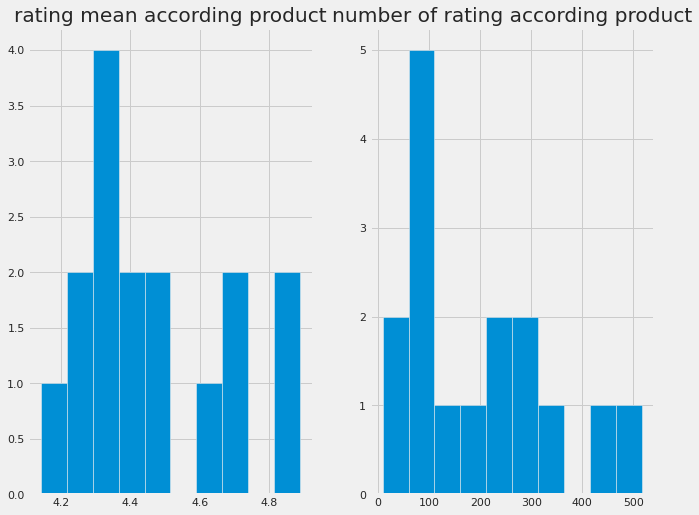

In [82]:
fig,ax = plt.subplots(1,2, figsize = (10,8))
ax[0].hist(ratings['rating'], bins = 10)
ax[0].set_title("rating mean according product")

ax[1].hist(ratings['number_of_rating'], bins =10)
ax[1].set_title("number of rating according product")

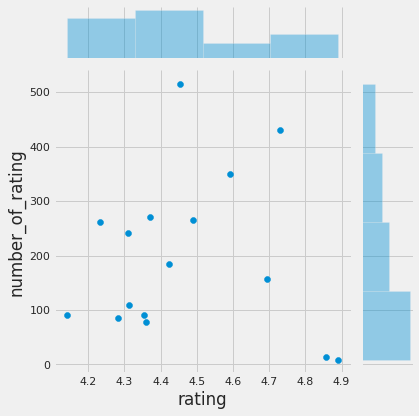

In [84]:
sns.jointplot(x='rating', y='number_of_rating', data=ratings)

In [90]:
feedback_matrix = amazon.pivot_table(index='cleaned_reviews', columns='variation', values='rating')
feedback_matrix.head()

variation,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
cleaned_reviews,,,,,,,,,,,,,,,,
,3.0,4.090909,4.111111,4.333333,3.333333,NaN,3.8,4.0,NaN,5.0,NaN,2.666667,2.0,3.0,3.666667,2.4
'll returning . 's nothing annoying . hub ca n't turned needed interferes hue bridge . ca n't even install philips lights unless unplug . plenty reviews go depth issues . bottom line sucks hub . n't support z-wave zigbee fairness knew advance one protocol support n't many functions dedicated one 's point noticed right away philips hue bridge supports firmware upgrades light bulbs n't . found rather interesting .,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'm addicted thing .,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'm amazed alarm . tell alexa wake particular song . love play list music . sure n't keep prime music still available . however love fact amazon gave music free 3 months ... given prime free 3 months well .,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'm amazed many movies tv shows available . planning drop cable service soon happy know 'll lots viewing pleasure fire stick pay outrageous cable bills .,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
ratings.sort_values('number_of_rating', ascending=False).head(20)

,rating,number_of_rating
variation,,
Black Dot,4.453488,516
Charcoal Fabric,4.730233,430
Configuration: Fire TV Stick,4.591429,350
Black Plus,4.370370,270
Black Show,4.490566,265
Black,4.233716,261
Black Spot,4.311203,241
White Dot,4.423913,184
Heather Gray Fabric,4.694268,157


In [92]:
feedback_matrix.columns

Index(['Black', 'Black  Dot', 'Black  Plus', 'Black  Show', 'Black  Spot',
       'Charcoal Fabric ', 'Configuration: Fire TV Stick',
       'Heather Gray Fabric ', 'Oak Finish ', 'Sandstone Fabric ',
       'Walnut Finish ', 'White', 'White  Dot', 'White  Plus', 'White  Show',
       'White  Spot'],
      dtype='object', name='variation')

In [0]:
Charcoal_fabric_user_rating = feedback_matrix['Charcoal Fabric ']
Back_Plus_user_rating = feedback_matrix['Black  Plus']

In [94]:
similar_to_charcoal_facbric=feedback_matrix.corrwith(Charcoal_fabric_user_rating)
similar_to_charcoal_facbric.head()

variation
Black          0.981706
Black  Dot     1.000000
Black  Plus         NaN
Black  Show         NaN
Black  Spot         NaN
dtype: float64